In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from math import floor,ceil
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split  # Add this import statement
from sklearn.ensemble import RandomForestClassifier  # Add this import statement
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df=pd.read_csv("./german.data",sep=" ",header=None)

headers=["Status of existing checking account","Duration in month","Credit history",\
         "Purpose","Credit amount","Savings account/bonds","Present employment since",\
         "Installment rate in percentage of disposable income","Personal status and sex",\
         "Other debtors / guarantors","Present residence since","Property","Age in years",\
        "Other installment plans","Housing","Number of existing credits at this bank",\
        "Job","Number of people being liable to provide maintenance for","Telephone","Foreign worker","Cost Matrix(Risk)"]
df.columns=headers



In [3]:
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Cost Matrix(Risk)
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:


label_encoders = {}  # Rečnik za čuvanje label encodera
categorical_columns = ["Status of existing checking account", "Credit history", "Purpose", "Savings account/bonds", "Present employment since",
                       "Personal status and sex", "Other debtors / guarantors", "Property", "Other installment plans",
                       "Housing", "Job", "Telephone", "Foreign worker"]

for column in categorical_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])  # Enkodiranje kolone u DataFrame-u
    label_encoders[column] = label_encoder  # Sačuvajte label encoder u rečnik



In [5]:
# Zamena vrednosti u "Cost Matrix(Risk)" koloni
df["Cost Matrix(Risk)"] = df["Cost Matrix(Risk)"].replace({1: 0, 2: 1})

# Sada imamo samo dve klase u ciljnoj varijabli: 0 (neporizčno) i 1 (rizično)

X = df.drop("Cost Matrix(Risk)", axis=1)
y = df["Cost Matrix(Risk)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Kreiranje Random Tree klasifikatora i treniranje modela
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluacija modela
y_pred = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("\nClassification Report:\n", report)


Accuracy: 0.7533333333333333
Confusion Matrix:
 [[194  15]
 [ 59  32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84       209
           1       0.68      0.35      0.46        91

    accuracy                           0.75       300
   macro avg       0.72      0.64      0.65       300
weighted avg       0.74      0.75      0.73       300



In [6]:
from sklearn.neighbors import KNeighborsClassifier
from termcolor import colored

In [7]:
def report(model, x, y, text="training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred, zero_division=True))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Confusion matrix for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=[0, 1], index=[0, 1]))  # Ovde ste koristili binarnu klasifikaciju
    print("---------------------------------------------------------------------------------")


In [8]:
# KNN model
knn = KNeighborsClassifier(n_neighbors=10)

# Obučite model
knn.fit(X_train, y_train)  # KNN očekuje da ciljna promenljiva bude jednostavan niz

# Pozovite funkciju za generisanje izveštaja za obučavanje
report(knn, X_train, y_train, "training")

# Pozovite funkciju za generisanje izveštaja za testiranje
report(knn, X_test, y_test, "testing")

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.96      0.83       491
           1       0.65      0.19      0.29       209

    accuracy                           0.73       700
   macro avg       0.69      0.57      0.56       700
weighted avg       0.71      0.73      0.67       700

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
     0   1
0  470  21
1  170  39
---------------------------------------------------------------------------------
Classification report for model KNeighborsClassifier on testing data
---------------------------------------------------------------------------------
              precision   

In [9]:
def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(7, 7))
    plot_tree(model, class_names=['B', 'M'], feature_names=feature_names, filled=True)
    plt.title("Decision tree of depth {} with {} nodes".format(model.get_depth(), model.get_n_leaves()))

    plt.show()
    print("---------------------------------------------------------------------------------")
    print(colored("Parameters of model {}".format(type(model).__name__), "green"))
    for k, v in model.get_params().items():
        print(colored(k, 'blue'), v)
    
    print("---------------------------------------------------------------------------------")


In [10]:
dtc = DecisionTreeClassifier()

In [11]:
dtc.fit(X_train, y_train) # treninranje modela

DecisionTreeClassifier()

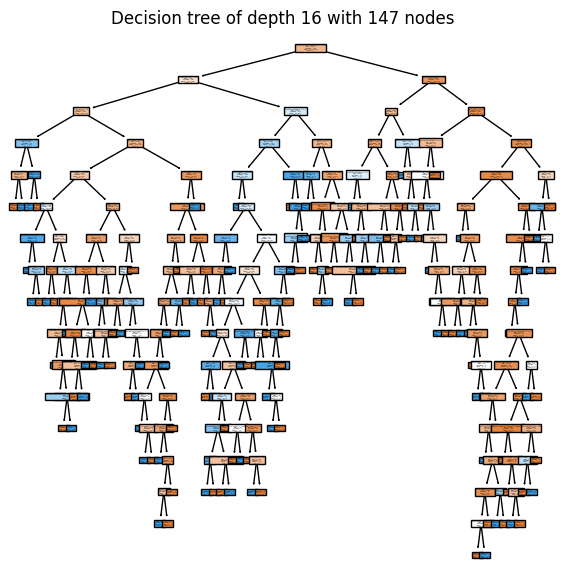

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [12]:
plot_decision_tree(dtc, feature_names=X.columns)

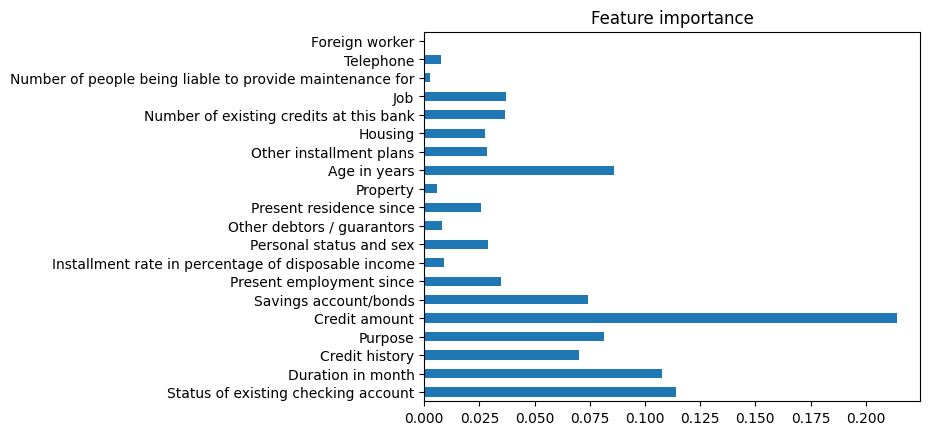

In [13]:
pd.Series(dtc.feature_importances_, index=X.columns).plot.barh()
plt.title("Feature importance")
plt.show()

In [14]:
report(dtc, X_train, y_train)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       491
           1       1.00      1.00      1.00       209

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
     0    1
0  491    0
1    0  209
---------------------------------------------------------------------------------


In [15]:
report(dtc, X_test, y_test, "test")

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       209
           1       0.47      0.44      0.45        91

    accuracy                           0.68       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.67      0.68      0.67       300

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
     0   1
0  163  46
1   51  40
---------------------------------------------------------------------------------


In [16]:
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['gini', 'entropy'],
          'max_depth': [2,4,6, 8]
         }


In [17]:
estimator = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=3)

In [18]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]})

In [19]:
estimator.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [20]:
estimator.best_score_

0.7128315175525476

In [21]:
report(estimator.best_estimator_, X_train, y_train)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       491
           1       0.68      0.55      0.61       209

    accuracy                           0.79       700
   macro avg       0.75      0.72      0.73       700
weighted avg       0.78      0.79      0.78       700

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
     0    1
0  438   53
1   95  114
---------------------------------------------------------------------------------


In [22]:
report(estimator.best_estimator_, X_test, y_test, "test")

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       209
           1       0.58      0.37      0.45        91

    accuracy                           0.73       300
   macro avg       0.67      0.63      0.64       300
weighted avg       0.71      0.73      0.71       300

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
     0   1
0  184  25
1   57  34
---------------------------------------------------------------------------------


In [23]:
estimator.cv_results_

{'mean_fit_time': array([0.00304151, 0.00286682, 0.0033404 , 0.00334764, 0.00212614,
        0.00282057, 0.00320903, 0.00320784]),
 'std_fit_time': array([0.00038284, 0.00063799, 0.00039497, 0.00083209, 0.00040598,
        0.00044035, 0.00098166, 0.00037456]),
 'mean_score_time': array([0.0016884 , 0.00147541, 0.00151499, 0.00155425, 0.00138005,
        0.00122015, 0.00137877, 0.00155457]),
 'std_score_time': array([5.88697052e-05, 3.74143976e-04, 5.22265873e-04, 4.84412616e-04,
        3.72465953e-04, 2.40963729e-04, 3.11224628e-04, 3.26219894e-04]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy', 'entropy'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[2, 4, 6, 8, 2, 4, 6, 8],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
            

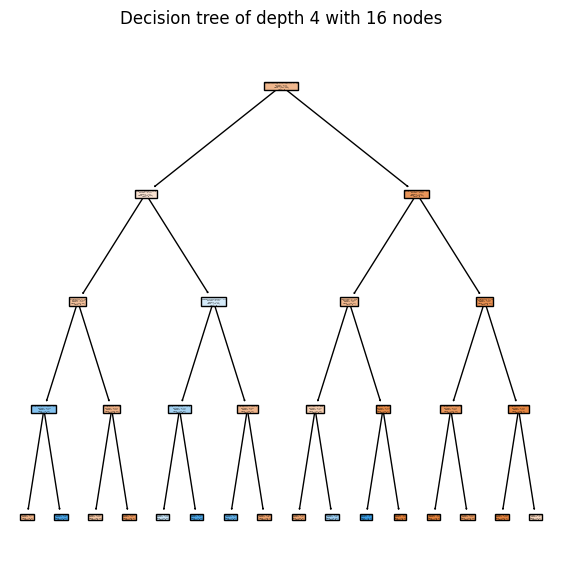

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion entropy
max_depth 4
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [24]:
plot_decision_tree(estimator.best_estimator_, feature_names=X.columns)

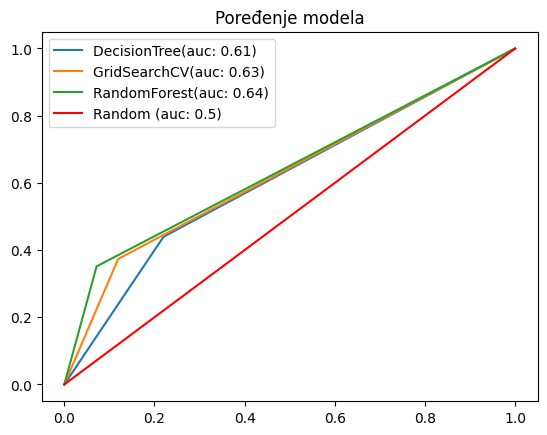

In [25]:


from sklearn.metrics import roc_curve, roc_auc_score
models = [dtc, estimator.best_estimator_, clf]
model_names = ['DecisionTree', 'GridSearchCV', 'RandomForest']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Poređenje modela")
plt.legend()
plt.show()

